<a href="https://colab.research.google.com/github/AnabelBerumen/DataScientist/blob/main/modelos/Regresi%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Con datos simulados
* y = a + b * x
* x : 100 valores distribuidos en una normal N(1.5, 2.5)
* Ye = 9 + 1.8 * x + e
* 'e' o 'res' : distribuido segun una normal N(0, 0.8)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)
res = 0 + 0.8 * np.random.randn(100)
y_pred = 9 + 1.8 * x
y_act = 9 + 1.8 * x + res

In [3]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [4]:
data = pd.DataFrame({
    'x': x_list,
    'y': y_act_list,
    'y_pred': y_pred_list
})

In [5]:
data.head()

,x,y,y_pred
0,-0.273084,7.567838,8.508448
1,-0.688091,8.016573,7.761436
2,1.715721,10.688548,12.088298
3,3.221598,13.685375,14.798876
4,1.375091,11.063824,11.475164


In [6]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list ) +1)]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

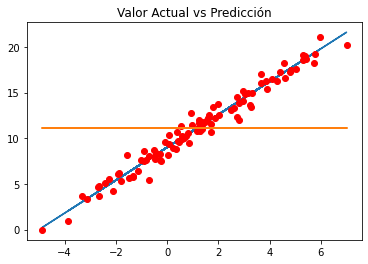

In [7]:
%matplotlib inline
plt.plot(x, y_pred)
plt.plot(x, y_act, 'ro')
plt.plot(x, y_mean)
plt.title('Valor Actual vs Predicción')

In [8]:
data['SSR'] =  (data['y_pred'] - np.mean(y_act)) **2
data['SSD'] = (data['y_pred'] - data['y']) **2
data['SST'] = (data['y'] - np.mean(y_act)) ** 2

In [9]:
data.head()

,x,y,y_pred,SSR,SSD,SST
0,-0.273084,7.567838,8.508448,7.091464,0.884747,12.985863
1,-0.688091,8.016573,7.761436,11.628050,0.065095,9.953114
2,1.715721,10.688548,12.088298,0.840649,1.959299,0.233174
3,3.221598,13.685375,14.798876,13.158371,1.239884,6.319925
4,1.375091,11.063824,11.475164,0.092255,0.169201,0.011579


In [10]:
SSR = sum(data['SSR'])
SSD = sum(data['SSD'])
SST = sum(data['SST'])
R2 = SSR/SST
print(f'SSR: {SSR}\nSSD: {SSD}\nSST: {SST}')
print(f'SSR + SSD = SST: {SSR + SSD}')
print(f'R2: {R2}')

SSR: 2028.213245216193
SSD: 62.71921623321554
SST: 2054.263434153622
SSR + SSD = SST: 2090.9324614494085
R2: 0.987318963817237


(array([ 2.,  6.,  3., 19., 23., 23., 12.,  7.,  3.,  2.]),
 array([-2.11609439, -1.67623923, -1.23638408, -0.79652892, -0.35667376,
         0.0831814 ,  0.52303656,  0.96289172,  1.40274687,  1.84260203,
         2.28245719]),
 <a list of 10 Patch objects>)

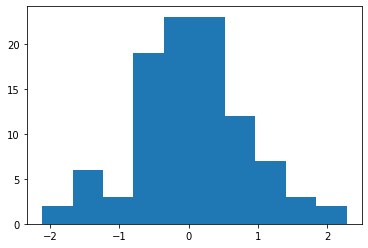

In [11]:
plt.hist(data['y_pred'] - data['y'])

## Obteniendo la recta de regresión
* y = a + b * x
* b = sum(xi - x_m) * (y_i - y_m) / sum((xi - x_m)^2)
* a = y_m - b * x_m

* $y_e = \alpha + \beta x$
* $\beta = \sum((xi - x_m)*(y_i - y_m)) / \sum((xi - x_m)^2)$
* $\alpha = y_n - \beta*x_m$

In [13]:
x_mean = np.mean(data['x'])
y_mean = np.mean(data['y'])
x_mean, y_mean

(1.2189018646474443, 11.17142868912199)

In [15]:
# covarianza
data['beta_n'] = (data['x']-x_mean) * (data['y']-y_mean)
# varianza de x
data['beta_d'] = (data['x']-x_mean) **2

# b = sum(xi - x_m) * (y_i - y_m) / sum((xi - x_m)^2)
beta = sum(data['beta_n']) / sum(data['beta_d'])

In [16]:
# a = y_m - b * x_m
alpha = y_mean - beta * x_mean

In [17]:
alpha, beta

(8.997183998508735, 1.7837733731272416)

El modelo lineal obtenido por regresion es y = 8.997183998508735 + 1.7837733731272416 * x

In [19]:
data['y_model'] = alpha + beta * data['x']

In [20]:
data.head()

,x,y,y_pred,SSR,SSD,SST,beta_n,beta_d,y_model
0,-0.273084,7.567838,8.508448,7.091464,0.884747,12.985863,5.376506,2.226022,8.510064
1,-0.688091,8.016573,7.761436,11.628050,0.065095,9.953114,6.016288,3.636622,7.769785
2,1.715721,10.688548,12.088298,0.840649,1.959299,0.233174,-0.239904,0.246829,12.057642
3,3.221598,13.685375,14.798876,13.158371,1.239884,6.319925,5.034669,4.010790,14.743784
4,1.375091,11.063824,11.475164,0.092255,0.169201,0.011579,-0.016807,0.024395,11.450035


In [24]:
SSR = sum((data['y_model']- y_mean) **2)
SSD = sum((data['y_model'] - data['y']) **2)
SST = sum((data['y'] - y_mean) **2)
R2 = SSR/SST
y_mean = [np.mean(y_act) for i in range(1, len(x_list ) +1)]
print(f'SSR: {SSR}\nSSD: {SSD}\nSST: {SST}')
print(f'SSR + SSD = SST: {SSR + SSD}')
print(f'R2: {R2}')

SSR: 1991.760091436826
SSD: 62.50334271679531
SST: 2054.263434153622
SSR + SSD = SST: 2054.2634341536213
R2: 0.9695738425376063


Text(0.5, 1.0, 'Valor Actual vs Predicción')

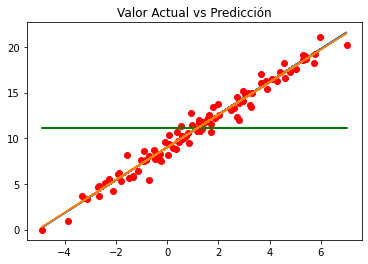

In [25]:
%matplotlib inline
plt.plot(data['x'], data['y_pred'])
plt.plot(data['x'], data['y'], 'ro')
plt.plot(data['x'], y_mean, 'g')
plt.plot(data['x'], data['y_model'])
plt.title('Valor Actual vs Predicción')


RSE: Error Estándar de los residuos


In [26]:
RSE = np.sqrt(SSD / (len(data) -2))
RSE

0.798617061798626

In [27]:
np.mean(data['y'])

11.17142868912199

In [28]:
RSE / 11.17142868912199

0.0714874600216772

## Regresión lineal simple en Python
### el paquete statsmodel para regresión lineal